<b>Цель:</b> <br>
1) Обучить нейронную сеть для классификации зарплаты на два класса >50k и <50k<br>
2) Визуализировать зависимость roc-auc оценки и ошибки от кол-ва нейронов<br>
3) Визуализировать зависимость roc-auc оценки и ошибки от значений параметра регулиризации l2<br>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
# from matplotlib import style
sns.set(font_scale=1.4)
#функция для confusion matrix
def plot_confussion_matrix(true_label, pred_label):
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix(true_label,
                                 pred_label
                                ), 
                annot=True, fmt='d',cmap='Blues',
               )
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'ROC-AUC = {round(roc_auc_score(true_label, pred_label),2)}')

 В этом ноутбуе будем работать с данными, которые обработали в ноутуке income-classification (1).ipynb

In [2]:
df = pd.read_csv('income_preproc.csv')
df.shape

(28970, 88)

In [3]:
df.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,x0_Federal-gov,x0_Local-gov,x0_Never-worked,...,x5_Portugal,x5_Puerto-Rico,x5_Scotland,x5_South,x5_Taiwan,x5_Thailand,x5_Trinadad&Tobago,x5_United-States,x5_Vietnam,x5_Yugoslavia
0,0.301370,0.800000,1.0,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,1.0,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,1.0,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,1.0,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,0.0,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
label = df['income']
df.drop('income', axis=1, inplace=True)
columns = df.columns
label = label.to_numpy()
data = df.to_numpy()
data = data.reshape((28970, 1,87))

In [6]:
(trainx,
 testx,
 trainy,
 testy) = train_test_split(data,
                          label,
                          test_size = .25,
                          random_state=18845
                  )
print(f'trainx: {trainx.shape}\ntestx: {testx.shape}')

trainx: (21727, 1, 87)
testx: (7243, 1, 87)


# Линейный классификатор

In [40]:
linear_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1,87)), 
    keras.layers.Dense(2, activation=tf.nn.softmax) # 2 - число классов
])

linear_model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

linear_model.fit(trainx, trainy, epochs=10)


Train on 21727 samples
Epoch 1/10
21727/21727 [==============================] - 1s 59us/sample - loss: 0.4803 - accuracy: 0.7616
Epoch 2/10
21727/21727 [==============================] - 1s 49us/sample - loss: 0.4339 - accuracy: 0.7897
Epoch 3/10
21727/21727 [==============================] - 1s 48us/sample - loss: 0.4207 - accuracy: 0.8043
Epoch 4/10
21727/21727 [==============================] - 1s 52us/sample - loss: 0.4126 - accuracy: 0.8081
Epoch 5/10
21727/21727 [==============================] - 1s 50us/sample - loss: 0.4065 - accuracy: 0.8085
Epoch 6/10
21727/21727 [==============================] - 1s 61us/sample - loss: 0.4020 - accuracy: 0.8101
Epoch 7/10
21727/21727 [==============================] - 1s 54us/sample - loss: 0.3983 - accuracy: 0.8118
Epoch 8/10
21727/21727 [==============================] - 1s 52us/sample - loss: 0.3951 - accuracy: 0.8126
Epoch 9/10
21727/21727 [==============================] - 1s 63us/sample - loss: 0.3924 - accuracy: 0.8145
Epoch 10/10
21

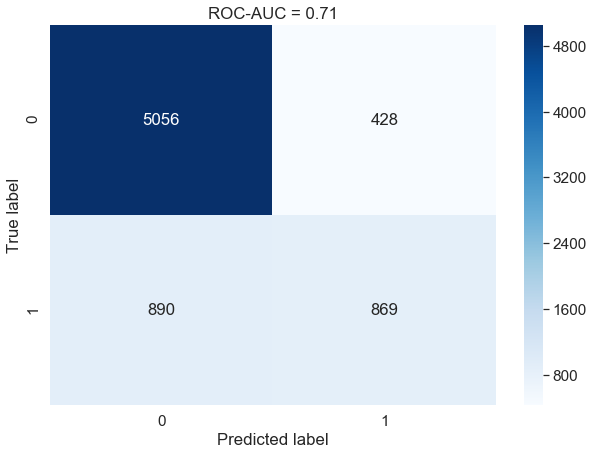

In [42]:
plot_confussion_matrix(testy,linear_model.predict_classes(testx))

# Многослойная нейросеть

Добавим один скрытый слой из 100 нейронов в модель:



In [43]:
linear_model = keras.Sequential()

linear_model.add(keras.layers.Flatten(input_shape=(1, 87)))
linear_model.add(keras.layers.Dense(100,))
linear_model.add(keras.layers.Activation('relu')) # скрытый слой из 100 нейронов
linear_model.add(keras.layers.Dense(2, activation=tf.nn.softmax))

In [44]:
linear_model.compile(optimizer=keras.optimizers.SGD(lr=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [45]:
linear_model.fit(trainx, trainy, epochs=10, verbose=1)


Train on 21727 samples
Epoch 1/10
21727/21727 [==============================] - 1s 69us/sample - loss: 0.4805 - accuracy: 0.7639
Epoch 2/10
21727/21727 [==============================] - 1s 52us/sample - loss: 0.4216 - accuracy: 0.7984
Epoch 3/10
21727/21727 [==============================] - 1s 56us/sample - loss: 0.4049 - accuracy: 0.8074
Epoch 4/10
21727/21727 [==============================] - 1s 59us/sample - loss: 0.3943 - accuracy: 0.8103
Epoch 5/10
21727/21727 [==============================] - 1s 54us/sample - loss: 0.3865 - accuracy: 0.8151
Epoch 6/10
21727/21727 [==============================] - 1s 55us/sample - loss: 0.3802 - accuracy: 0.8192
Epoch 7/10
21727/21727 [==============================] - 1s 67us/sample - loss: 0.3751 - accuracy: 0.8216
Epoch 8/10
21727/21727 [==============================] - 1s 59us/sample - loss: 0.3704 - accuracy: 0.8249
Epoch 9/10
21727/21727 [==============================] - 1s 56us/sample - loss: 0.3670 - accuracy: 0.8263
Epoch 10/10
21

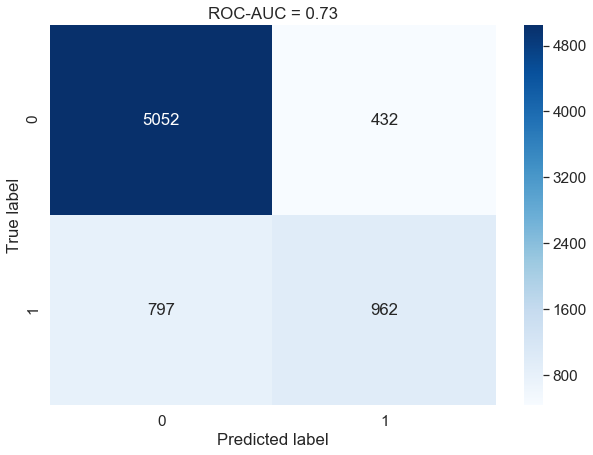

In [46]:
plot_confussion_matrix(testy,linear_model.predict_classes(testx))

Добавим 2 скрытых слойов по 100 нейронов:


In [70]:
linear_model = keras.Sequential()

linear_model.add(keras.layers.Flatten(input_shape=(1, 87)))
linear_model.add(keras.layers.Dense(100))
linear_model.add(keras.layers.Activation('relu')) # скрытый слой из 100 нейронов
linear_model.add(keras.layers.Dense(100))
linear_model.add(keras.layers.Activation('relu')) # скрытый слой из 100 нейронов
linear_model.add(keras.layers.Dense(2, activation=tf.nn.softmax))

linear_model.compile(optimizer=keras.optimizers.SGD(lr=0.01), 
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

linear_model.fit(trainx, trainy, epochs=10, verbose=1)


Train on 21727 samples
Epoch 1/10
21727/21727 [==============================] - 2s 75us/sample - loss: 0.4771 - accuracy: 0.7620
Epoch 2/10
21727/21727 [==============================] - 1s 62us/sample - loss: 0.4093 - accuracy: 0.8069
Epoch 3/10
21727/21727 [==============================] - 1s 63us/sample - loss: 0.3878 - accuracy: 0.8164
Epoch 4/10
21727/21727 [==============================] - 1s 63us/sample - loss: 0.3752 - accuracy: 0.8233
Epoch 5/10
21727/21727 [==============================] - 1s 65us/sample - loss: 0.3667 - accuracy: 0.8264
Epoch 6/10
21727/21727 [==============================] - 1s 66us/sample - loss: 0.3609 - accuracy: 0.8289
Epoch 7/10
21727/21727 [==============================] - 1s 68us/sample - loss: 0.3573 - accuracy: 0.8309
Epoch 8/10
21727/21727 [==============================] - 1s 66us/sample - loss: 0.3535 - accuracy: 0.8334
Epoch 9/10
21727/21727 [==============================] - 1s 66us/sample - loss: 0.3511 - accuracy: 0.8346
Epoch 10/10
21

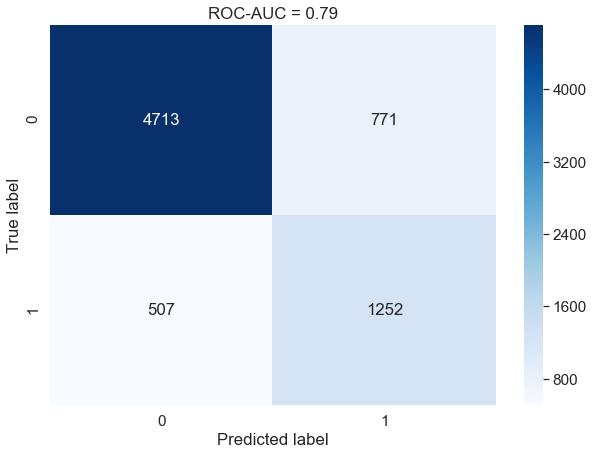

In [71]:
plot_confussion_matrix(testy,linear_model.predict_classes(testx))

# Посмотрим на roc-auc и ошибку в завистимости от кол-ва нейронов

In [175]:
%%time
n_neurons = list(range(25, 500, 25))
test_err_neuron = []
train_err_neuron = []
test_auc_neuron = []
train_auc_neuron = []

for n in tqdm_notebook(n_neurons):
    linear_model = keras.Sequential()
    linear_model.add(keras.layers.Flatten(input_shape=(1, 87)))
    linear_model.add(keras.layers.Dense(n))
    linear_model.add(keras.layers.Activation('relu')) 
    linear_model.add(keras.layers.Dense(2, activation=tf.nn.softmax))

    linear_model.compile(optimizer=keras.optimizers.SGD(lr=0.01), 
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
    linear_model.fit(trainx, trainy, epochs=10, verbose=0)
    test_auc_neuron.append(roc_auc_score(testy,linear_model.predict_classes(testx)))
    train_auc_neuron.append(roc_auc_score(trainy,linear_model.predict_classes(trainx)))
    test_err_neuron.append(np.mean(testy!=linear_model.predict_classes(testx)))
    train_err_neuron.append(np.mean(trainy!=linear_model.predict_classes(trainx)))

C:\Users\Arman\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`




Wall time: 9min 3s


 Зависимость auc-roc оценки от кол-ва нейронов в слое

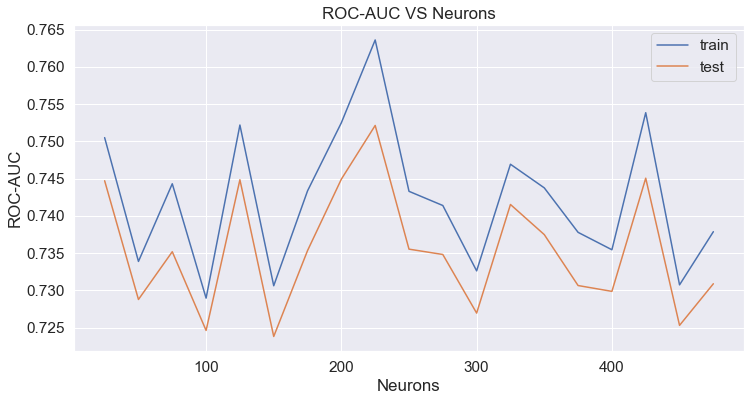

In [176]:
plt.figure(figsize=(12,6))
plt.plot(n_neurons, train_auc_neuron, label = 'train')
plt.plot(n_neurons, test_auc_neuron, label = 'test')

plt.title('ROC-AUC VS Neurons')
plt.xlabel('Neurons')
plt.ylabel('ROC-AUC')
plt.legend()
plt.show()

 Зависимость ошибки от кол-ва нейронов в слое

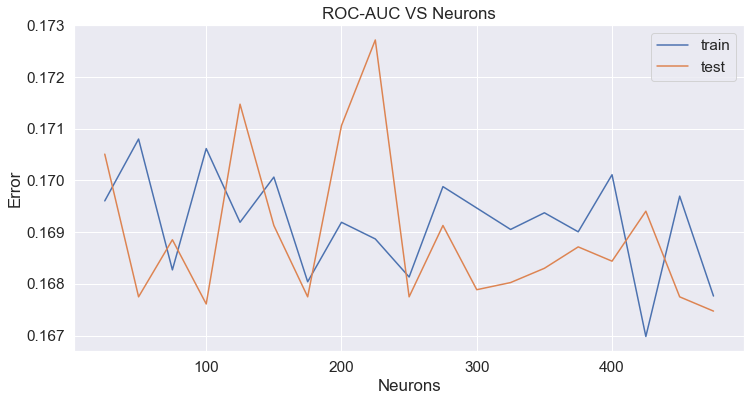

In [178]:
plt.figure(figsize=(12,6))
plt.plot(n_neurons, train_err_neuron, label = 'train')
plt.plot(n_neurons, test_err_neuron, label = 'test')
plt.title('ROC-AUC VS Neurons')
plt.xlabel('Neurons')
plt.ylabel('Error')
plt.legend()
plt.show()

 Посмотрим на roc-auc и ошибку в завистимости параметра регулиризации l2

In [149]:
%%time
from keras.regularizers import l2

alfa_list = np.logspace(-3, 2, 21)
test_err_alfa = []
test_auc_alfa = []
train_err_alfa = []
train_auc_alfa = []
for alfa in tqdm_notebook(alfa_list):

    linear_model = keras.Sequential()

    linear_model.add(keras.layers.Flatten(input_shape=(1, 87)))
    linear_model.add(keras.layers.Dense(150,kernel_regularizer=l2(alfa)))
    linear_model.add(keras.layers.Activation('relu')) # скрытый слой из 100 нейронов
    linear_model.add(keras.layers.Dense(2, activation=tf.nn.softmax))

    linear_model.compile(optimizer=keras.optimizers.SGD(lr=0.01), 
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

    linear_model.fit(trainx, trainy, epochs=10, verbose=1)
    test_auc_alfa.append(roc_auc_score(testy,linear_model.predict_classes(testx)))
    train_auc_alfa.append(roc_auc_score(trainy,linear_model.predict_classes(trainx)))
    test_err_alfa.append(np.mean(testy!=linear_model.predict_classes(testx)))
    train_err_alfa.append(np.mean(trainy!=linear_model.predict_classes(trainx)))

Train on 21727 samples
Epoch 1/10
21727/21727 [==============================] - 1s 62us/sample - loss: 0.5912 - accuracy: 0.7575
Epoch 2/10
21727/21727 [==============================] - 1s 52us/sample - loss: 0.5190 - accuracy: 0.8043
Epoch 3/10
21727/21727 [==============================] - 1s 52us/sample - loss: 0.5004 - accuracy: 0.8127
Epoch 4/10
21727/21727 [==============================] - 1s 53us/sample - loss: 0.4886 - accuracy: 0.8150
Epoch 5/10
21727/21727 [==============================] - 1s 55us/sample - loss: 0.4791 - accuracy: 0.8188
Epoch 6/10
21727/21727 [==============================] - 1s 57us/sample - loss: 0.4715 - accuracy: 0.8215
Epoch 7/10
21727/21727 [==============================] - 1s 54us/sample - loss: 0.4646 - accuracy: 0.8240
Epoch 8/10
21727/21727 [==============================] - 1s 55us/sample - loss: 0.4589 - accuracy: 0.8277
Epoch 9/10
21727/21727 [==============================] - 1s 61us/sample - loss: 0.4536 - accuracy: 0.8283
Epoch 10/10
21

21727/21727 [==============================] - 2s 71us/sample - loss: 0.4355 - accuracy: 0.8105
Epoch 6/10
21727/21727 [==============================] - 1s 65us/sample - loss: 0.4251 - accuracy: 0.8134s - loss: 0
Epoch 7/10
21727/21727 [==============================] - 1s 65us/sample - loss: 0.4200 - accuracy: 0.8151
Epoch 8/10
21727/21727 [==============================] - 2s 69us/sample - loss: 0.4170 - accuracy: 0.8157
Epoch 9/10
21727/21727 [==============================] - 1s 67us/sample - loss: 0.4145 - accuracy: 0.8162
Epoch 10/10
21727/21727 [==============================] - 1s 67us/sample - loss: 0.4125 - accuracy: 0.8162
Train on 21727 samples
Epoch 1/10
21727/21727 [==============================] - 2s 79us/sample - loss: 4.3291 - accuracy: 0.7421
Epoch 2/10
21727/21727 [==============================] - 1s 63us/sample - loss: 0.7245 - accuracy: 0.7691
Epoch 3/10
21727/21727 [==============================] - 1s 64us/sample - loss: 0.4754 - accuracy: 0.7875
Epoch 4/10
21

21727/21727 [==============================] - 1s 56us/sample - loss: 0.5501 - accuracy: 0.7505
Epoch 10/10
21727/21727 [==============================] - 1s 58us/sample - loss: 0.5490 - accuracy: 0.7505
Train on 21727 samples
Epoch 1/10
21727/21727 [==============================] - 2s 71us/sample - loss: 4.8762 - accuracy: 0.7458
Epoch 2/10
21727/21727 [==============================] - 1s 56us/sample - loss: 0.5590 - accuracy: 0.7505
Epoch 3/10
21727/21727 [==============================] - 1s 56us/sample - loss: 0.5589 - accuracy: 0.7505
Epoch 4/10
21727/21727 [==============================] - 1s 59us/sample - loss: 0.5586 - accuracy: 0.7505
Epoch 5/10
21727/21727 [==============================] - 1s 57us/sample - loss: 0.5584 - accuracy: 0.7505
Epoch 6/10
21727/21727 [==============================] - 1s 55us/sample - loss: 0.5581 - accuracy: 0.7505
Epoch 7/10
21727/21727 [==============================] - 1s 56us/sample - loss: 0.5580 - accuracy: 0.7505
Epoch 8/10
21727/21727 [

 Зависимость roc-auc от параметра регулиризации альфа

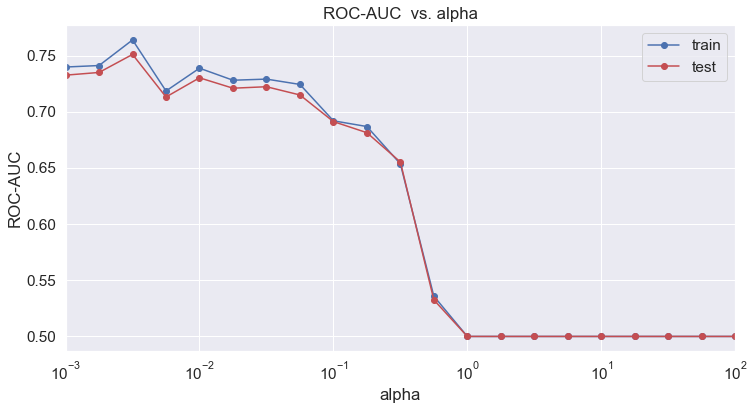

In [158]:
plt.figure(figsize=(12,6))

plt.semilogx(alfa_list, train_auc_alfa, 'b-o', label = 'train')
plt.semilogx(alfa_list, test_auc_alfa, 'r-o', label = 'test')
plt.xlim([np.max(alfa_list), np.min(alfa_list)])
plt.title('ROC-AUC  vs. alpha')
plt.xlabel('alpha')
plt.ylabel('ROC-AUC')
plt.legend()
pass

Зависимость ошибки от параметра регулиризации альфа

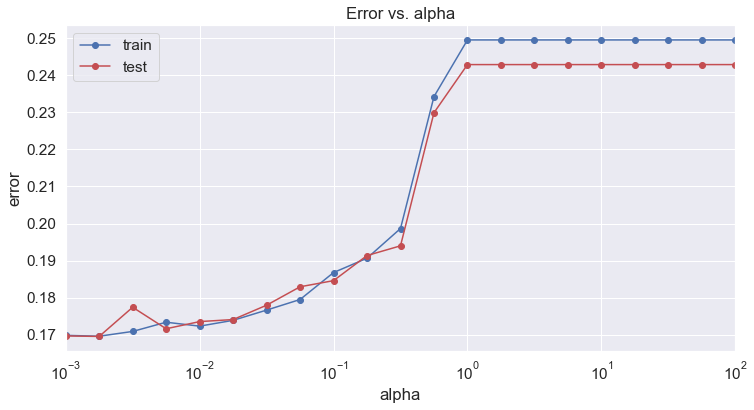

In [154]:
plt.figure(figsize=(12,6))

plt.semilogx(alfa_list, train_err_alfa, 'b-o', label = 'train')
plt.semilogx(alfa_list, test_err_alfa, 'r-o', label = 'test')
plt.xlim([np.max(alfa_list), np.min(alfa_list)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass